<a href="https://colab.research.google.com/github/Kharebova-Irina/MATHEMATIC_METHODS_IN_BIOLOGY_AND_MEDICINE/blob/main/%D0%9B%D0%A0_NO_1_2_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2_%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

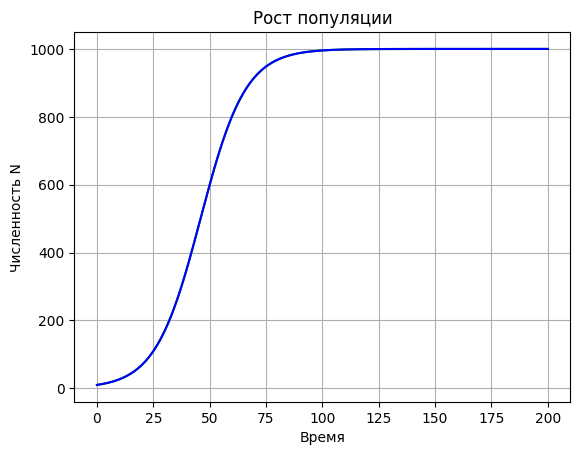

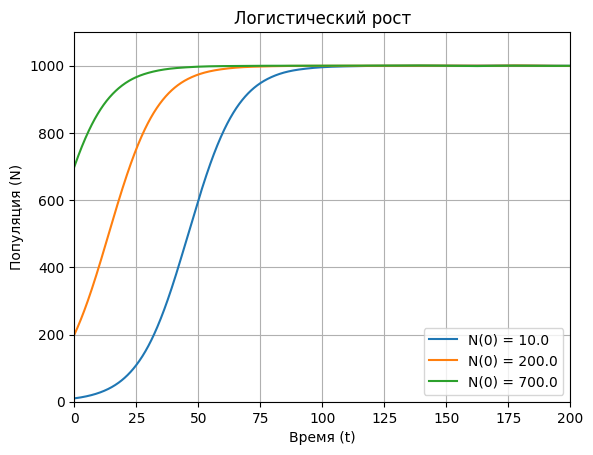

In [ ]:
# Лабораторная работа № 1.1
import numpy as np
import matplotlib.pyplot as plt


r = 0.1
K = 1000
N0 = 10
h = 0.1
t_max = 200


N = N0
t = 0
times = [t]
populations = [N]



def Runge_Kutta(r, K, N0, h, t_max, t, N):
    while t < t_max:
        k1 = h * r * N * (1 - N / K)
        k2 = h * r * (N + k1 / 2) * (1 - (N + k1 / 2) / K)
        k3 = h * r * (N + k2 / 2) * (1 - (N + k2 / 2) / K)
        k4 = h * r * (N + k3) * (1 - (N + k3) / K)
        N += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        times.append(t)
        populations.append(N)

    return times, populations

r = 0.1
K = 1000
t_max = 200
h = 0.01
t = 0
s = 10
times_1 = [t]
populations_1 = [s]

C1 = (K - s) / s

def Analitical_solution(r, K, h, t_max, t, C1, s):
    while t < t_max:
        s = K / (1 + C1*np.exp(- r * t))
        t += h
        times_1.append(t)
        populations_1.append(s)
    return times_1, populations_1


x0, y0 = Runge_Kutta(r, K, N0, h, t_max, t, N)
x1, y1 = Analitical_solution(r, K, h, t_max, t, C1, s)
plt.plot(x0, y0, label = 'Метод Рунге-Кутта', color = 'g')
plt.plot(x1, y1, label = 'Аналитическое решение', color = 'b')
plt.xlabel('Время')
plt.ylabel('Численность N')
plt.title('Рост популяции')
plt.grid()
plt.show()

from scipy.integrate import solve_ivp

# Определяем логистическую функцию
def logistic_growth(t, N, r, K):
    return r * N * (1 - N / K)

# Параметры
r = 0.1
K = 1000
t_span = (0, 200)  # время от 0 до 200

# Начальные условия
initial_conditions = [10, 200, 700]

# Список для хранения решений
solutions = []

# Решаем уравнение для каждой начальной условия
for N0 in initial_conditions:
    sol = solve_ivp(logistic_growth, t_span, [N0], args=(r, K), dense_output=True)
    solutions.append(sol)

# Создаем график
t_vals = np.linspace(0, 200, 1000)  # Временные точки для построения графика
for sol in solutions:
    N_vals = sol.sol(t_vals)[0]  # Получаем значения N для каждого времени
    plt.plot(t_vals, N_vals, label=f'N(0) = {sol.y[0][0]}')

# Настройки графика
plt.title('Логистический рост')
plt.xlabel('Время (t)')
plt.ylabel('Популяция (N)')
plt.legend()
plt.grid()
plt.xlim(0, 200)
plt.ylim(0, K + 100)
plt.show()


<ipython-input-54-ef3f1d9a8296>:19: RuntimeWarning: divide by zero encountered in log
  k1 = r * h * N * (1 - np.log(N) / K)
<ipython-input-54-ef3f1d9a8296>:19: RuntimeWarning: invalid value encountered in scalar multiply
  k1 = r * h * N * (1 - np.log(N) / K)
<ipython-input-54-ef3f1d9a8296>:35: RuntimeWarning: divide by zero encountered in log
  N = h * r * N * (1 - np.log(N) / K)
<ipython-input-54-ef3f1d9a8296>:35: RuntimeWarning: invalid value encountered in scalar multiply
  N = h * r * N * (1 - np.log(N) / K)


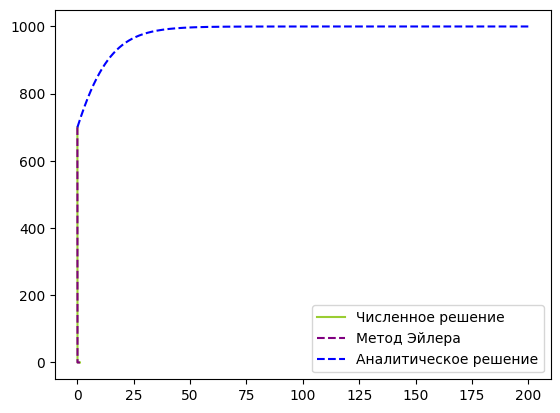

In [ ]:
# Лабораторная работа № 1.2

import numpy as np
import matplotlib.pyplot as plt

t = 0
t_max = 200
h = 0.01
r = 0.1
K = 1000
N0 = 700

N = N0
times_2 = [t]
populations_2 = [N]

def Runge_Kutta_sys(N, r, K, h, t, t_max):
    while t < t_max:
        k1 = r * h * N * (1 - np.log(N) / K)
        k2 = r * h * (N + k1 / 2) * (1 - np.log(N + k1 / 2) / K)
        k3 = r * h * (N + k2 / 2) * (1 - np.log(N + k2 / 2) / K)
        k4 = r * h * (N + k3) * (1 - np.log(N + k3) / K)
        N = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t += h
        times_2.append(t)
        populations_2.append(N)
    return times_2, populations_2

times_3 = [t]
populations_3 = [N]


def Euler_method(N, r, K, h, t, t_max):
    while t < t_max:
        N = h * r * N * (1 - np.log(N) / K)
        t += h
        times_3.append(t)
        populations_3.append(N)
    return times_3, populations_3

times_4 = [t]
solutions = [N]

C = N0 / (K - N0)

def Analitical_solution(r, t, h, t_max, K, N):
    while t < t_max:
        N = (K * C * np.exp(r * t))/(1 + C * np.exp(r * t))
        t += h
        times_4.append(t)
        solutions.append(N)
    return times_4, solutions




x5, y5 = Runge_Kutta_sys(N, r, K, h, t, t_max)
x6, y6 = Euler_method(N, r, K, h, t, t_max)
x7, y7 = Analitical_solution(r, t, h, t_max, K, N)
plt.plot(x5, y5, color = 'yellowgreen', label = "Численное решение")
plt.plot(x6, y6, "--", color = 'purple', label = "Метод Эйлера")
plt.plot(x7, y7, "--", color = 'b', label = "Аналитическое решение")
plt.legend()
plt.show()